In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
raw = pd.read_csv('../data/MULTI_timenews_eco_health_edu_round9_raw.csv')

In [3]:
countries = ['DE','FR','IT','HU','PL']

In [4]:
raw = raw[raw['cntry'].isin(countries)].drop(columns='Unnamed: 12').reset_index(drop=True)

In [5]:
raw.head()

,essround,idno,cntry,nwspol,prtvede1,prtvtdfr,prtvtfhu,prtvtcit,prtvtdpl,stfeco,stfedu,stfhlth
0,9,1,DE,60,4.0,NaN,NaN,NaN,NaN,5,4,5
1,9,63,DE,30,66.0,NaN,NaN,NaN,NaN,5,5,6
2,9,108,DE,15,66.0,NaN,NaN,NaN,NaN,9,8,5
3,9,117,DE,90,1.0,NaN,NaN,NaN,NaN,7,7,6
4,9,134,DE,60,1.0,NaN,NaN,NaN,NaN,9,8,9


In [6]:
cols = {'essround':'round',
        'cntry':'country',
        'nwspol':'news_mm/day',
        'stfeco':'sat_eco',
        'stfedu':'sat_edu', 
        'stfhlth':'sat_health',
        'prtvede1':'party_de',
        'prtvtdfr':'party_fr', 
        'prtvtfhu':'party_hu', 
        'prtvtcit':'party_it', 
        'prtvtdpl':'party_pl' }

In [7]:
df = raw.rename(columns=cols)

In [8]:
#I want to re-order the columns
df = df[['country',
         'idno',
         'party_de', 
         'party_fr',
         'party_hu', 
         'party_it', 
         'party_pl', 
         'news_mm/day', 
         'sat_eco', 
         'sat_edu', 
         'sat_health',
         'round' ]]

In [9]:
df.head()

,country,idno,party_de,party_fr,party_hu,party_it,party_pl,news_mm/day,sat_eco,sat_edu,sat_health,round
0,DE,1,4.0,NaN,NaN,NaN,NaN,60,5,4,5,9
1,DE,63,66.0,NaN,NaN,NaN,NaN,30,5,5,6,9
2,DE,108,66.0,NaN,NaN,NaN,NaN,15,9,8,5,9
3,DE,117,1.0,NaN,NaN,NaN,NaN,90,7,7,6,9
4,DE,134,1.0,NaN,NaN,NaN,NaN,60,9,8,9,9


### Now we slice our df and create different subsets for each country
#### DE

In [10]:
de=df[df['country']=='DE'].drop(columns=['party_fr','party_hu','party_it','party_pl']).reset_index(drop=True)

In [11]:
#### Now we divide again our df in 3: 
#### de_f: those who voted for AfD (party==6)  or NPD(party==8)
#### de_novot: those who didn´t vote (party == 66)
#### de_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [12]:
de_f = de[de["party_de"].isin([6,8])]

In [13]:
de_novot = de[de["party_de"]== 66]

In [14]:
de_nof = de[~de["party_de"].isin([6,8,66,77,88])]

#### FR

In [15]:
fr=df[df['country']=='FR'].drop(columns=['party_de','party_hu','party_it','party_pl']).reset_index(drop=True)

In [16]:
#### fr_f: those who voted for FN (party==11)  
#### fr_novot: those who didn´t vote (party == 66)
#### fr_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [17]:
fr_f = fr[fr["party_fr"]==11]

In [18]:
fr_novot = fr[fr["party_fr"]==66]

In [19]:
fr_nof = fr[~fr["party_fr"].isin([11,66,77,88])]

#### IT

In [20]:
it=df[df['country']=='IT'].drop(columns=['party_de','party_hu','party_fr','party_pl']).reset_index(drop=True)

In [21]:
#### it_f: those who voted for Lega (party==9)  
#### it_novot: those who didn´t vote (party == 66)
#### it_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [22]:
it_f = it[it["party_it"]==9]

In [23]:
it_novot = it[it["party_it"]==66]

In [24]:
it_nof = it[~it["party_it"].isin([9,66,77,88])]

#### PL

In [25]:
pl=df[df['country']=='PL'].drop(columns=['party_de','party_hu','party_fr','party_it']).reset_index(drop=True)

In [26]:
#### pl_f: those who voted for PiS (party==6)  
#### pl_novot: those who didn´t vote (party == 66)
#### pl_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [27]:
pl_f = pl[pl["party_pl"]==6]

In [28]:
pl_novot = pl[pl["party_pl"]==66]

In [29]:
pl_nof = pl[~pl["party_pl"].isin([6,66,77,88])]

#### HU

In [30]:
hu=df[df['country']=='HU'].drop(columns=['party_de','party_pl','party_fr','party_it']).reset_index(drop=True)

In [31]:
#### hu_f: those who voted for Fidesz (party==3)  
#### hu_novot: those who didn´t vote (party == 66)
#### hu_nof: the rest (also excluding those who didn´t answer(77) or didn´t know(88)

In [32]:
hu_f = hu[hu["party_hu"]==3]

In [33]:
hu_novot = hu[hu["party_hu"]==66]

In [34]:
hu_nof = hu[~hu["party_hu"].isin([3,66,77,88])]

### On a typical day, about how much time do you spend watching, reading or listening to news about politics and current affairs? 
##### news_mm/day

#### DE

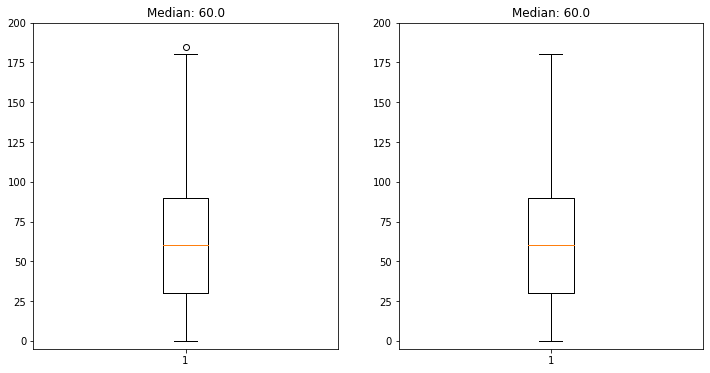

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(de_nof['news_mm/day']);
axes[1].boxplot(de_f['news_mm/day']);
axes[0].set_ylim([-5,200]);
axes[1].set_ylim([-5,200]);
axes[1].set_title(f"Median: {round(de_f['news_mm/day'].median())}");
axes[0].set_title(f"Median: {round(de_nof['news_mm/day'].median())}");
plt.savefig('../graphs/minutes_news_de.png')

In [36]:
de_f['news_mm/day'].median()

60.0

In [52]:
de_f.shape

(97, 8)

In [54]:
de_f[de_f['news_mm/day']>40].shape

(60, 8)

In [37]:
de_nof['news_mm/day'].median()

60.0

#### FR

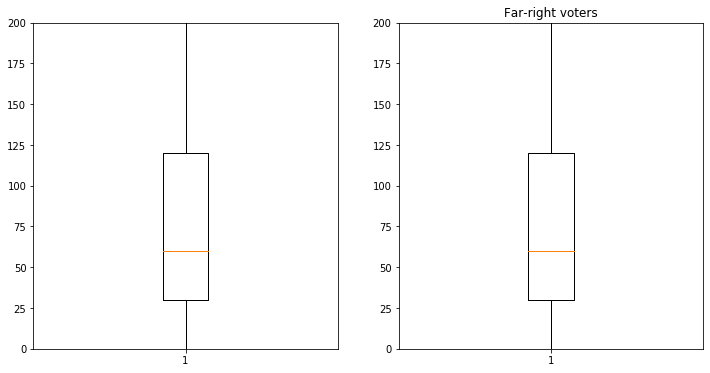

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(fr_nof['news_mm/day']);
axes[1].boxplot(fr_f['news_mm/day']);
axes[0].set_ylim([0,200]);
axes[1].set_ylim([0,200]);
axes[1].set_title('Far-right voters');

In [39]:
fr_f['news_mm/day'].median()

60.0

In [40]:
fr_nof['news_mm/day'].median()

60.0

#### IT

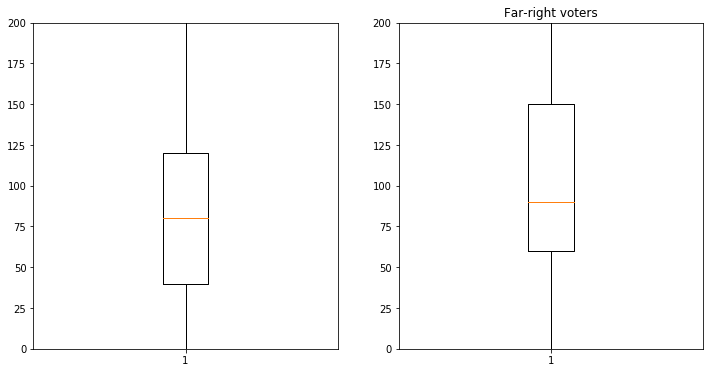

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(it_nof['news_mm/day']);
axes[1].boxplot(it_f['news_mm/day']);
axes[0].set_ylim([0,200]);
axes[1].set_ylim([0,200]);
axes[1].set_title('Far-right voters');

In [42]:
it_f['news_mm/day'].median()

90.0

In [43]:
it_nof['news_mm/day'].median()

80.0

#### PL

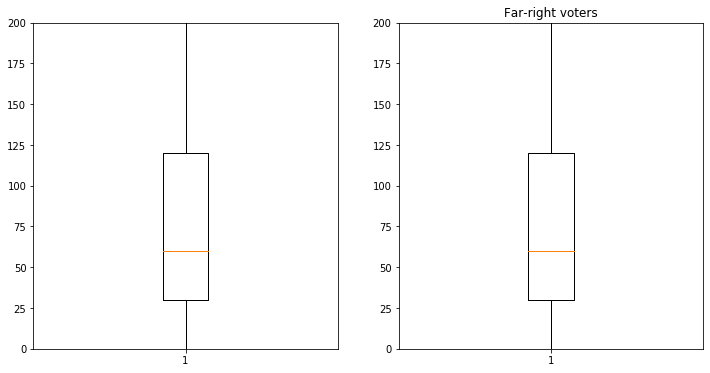

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(pl_nof['news_mm/day']);
axes[1].boxplot(pl_f['news_mm/day']);
axes[0].set_ylim([0,200]);
axes[1].set_ylim([0,200]);
axes[1].set_title('Far-right voters');

In [45]:
pl_f['news_mm/day'].median()

60.0

In [46]:
pl_nof['news_mm/day'].median()

60.0

#### HU

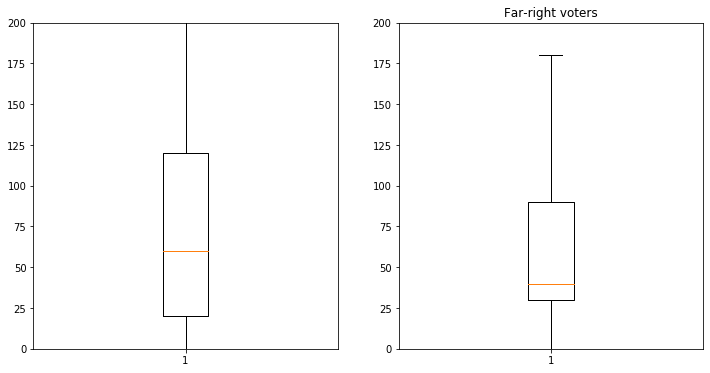

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
axes[0].boxplot(hu_nof['news_mm/day']);
axes[1].boxplot(hu_f['news_mm/day']);
axes[0].set_ylim([0,200]);
axes[1].set_ylim([0,200]);
axes[1].set_title('Far-right voters');

In [48]:
hu_f['news_mm/day'].median()

40.0

In [49]:
hu_nof['news_mm/day'].median()

60.0